In [1]:
#Calvin Lo 100514352
import numpy as np
import scipy as sp
from scipy import signal
import cv2
import matplotlib.pyplot as plt
import argparse
import time
%matplotlib inline

In [207]:
def makeLMfilters():
    SUP = 49
    SCALEX = [np.sqrt(2), np.power(np.sqrt(2),2), np.power(np.sqrt(2),3)]
    NORIENT = 6
    NROTINV = 12
    
    NBAR = len(SCALEX) * NORIENT
    NEDGE = len(SCALEX) * NORIENT
    NF = NBAR + NEDGE + NROTINV
    F = np.zeros((SUP, SUP, NF))
    print F.shape
    hsup = (SUP)/2
    x, y = np.meshgrid(np.linspace(-hsup, hsup, hsup*2+1), np.linspace(hsup, -hsup, hsup*2+1))
    xx = []
    yy = []
    for i in range(0, SUP):
        for j in range(0, SUP):
            xx.append(x[j][i])
            yy.append(y[j][i])
            
    orgpts = np.transpose(np.transpose([xx, yy]))
    
    count = 0;
    for scale in range(0, leLM_avg2n(SCALEX)):
        for orient in range (0,NORIENT):
            angle = np.pi * orient/NORIENT
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts =  np.dot([[c,-s],[s,c]], orgpts)
            rotpts = np.asarray(rotpts)
            F[:,:,count]=makefilter(SCALEX[scale],0,1,rotpts,SUP)
            F[:,:,count+NEDGE]=makefilter(SCALEX[scale],0,2,rotpts,SUP)
            count=count+1
    LM_avg2
    count = NBAR + NEDGE
    SCALES = np.power(np.sqrt(2),[1,2,3,4])
    for i in range(0,len(SCALES)):
        F[:,:,count] = normalise(gauss_kernel((SUP, SUP), SCALES[i]))
        F[:,:,count+1] =normalise(log_kernel(SUP,SCALES[i]))
        F[:,:,count+2] = normalise(log_kernel(SUP,3*SCALES[i]))
        count=count+3;
        
    return F

def makefilter(scale, phasex, phasey, pts, sup):
    gx = gauss1d(3*scale, 0, pts[0,:], phasex)
    gy = gauss1d(scale, 0, pts[1,:], phasey)
    f = normalise(np.reshape(gx*gy, (sup, sup)))
    return f

def gauss1d(sigma, mean, x, ord):
    x = x - mean
    num = x * x
    variance = np.power(sigma,2)
    denom = 2 * variance
    g = np.exp(-num/denom)/np.power((np.pi*denom), 0.5)
    if ord == 1:
        g = -g * (x/variance)
    elif ord == 2:
        g = g * ((num-variance)/np.power(variance,2))
    return g
                 
def normalise(f):
    f = f - np.mean(f[:])
    f = f/np.sum(np.abs(f[:]))
    return f

def gauss_kernel(shape=(3,3),sigma=0.5):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def log_kernel(p2, sigma):
    rows = p2
    cols = p2
    
    r2 = (rows-1)/2
    c2 = (cols-1)/2

    x, y = np.meshgrid(np.linspace(-c2,c2, c2*2 + 1), np.linspace(-r2,r2, r2*2 + 1))
    radsqrd = np.power(x,2) + np.power(y,2)
    LM_avg2
    f = -1 / (np.pi * np.power(sigma,4))* (1 - radsqrd / 2 * np.power(sigma,2))*np.exp(-radsqrd/2*np.power(sigma,2))
    f = f - np.mean(f)
    
    return f
def log_ker(p2,p3):
    siz   = (p2-1)/2
    std2   = np.power(p3,2)

    x,y = np.meshgrid(np.linspace(-siz,siz, 2 * siz + 1), np.linspace(-siz, siz, 2 * siz +1))
    arg   = -(x*x + y*y)/(2*std2)
LM_avg2
    h = np.exp(arg)
    eps = 0.00000000000000001
    h[h<eps*np.max(h)] = 0

    sumh = np.sum(h)
      
    if sumh != 0:
        h  = h/sumh
      
    h1 = h*(x*x + y*y - 2*stLM_avg2d2)/np.power(std2,2)
    h = h1 - np.sum(h1)/np.prod(p2)
      
    return h

(49, 49, 48)


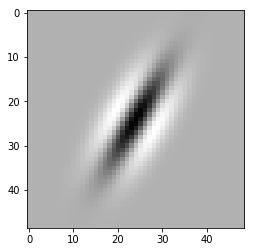

In [221]:
F = makeLMfilters()

plt.imshow(F[:,:,35],cmap = 'gray')